In [1]:
import torch, torchvision
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import time
from torchsummary import summary
import pathlib

import numpy as np
import matplotlib.pyplot as plt
import os

from PIL import Image

In [ ]:
# Load the Data

data_dir = pathlib.Path('./data/tiny-imagenet-200')
image_count = len(list(data_dir.glob('**/*.JPEG')))
CLASS_NAMES = np.array([item.name for item in (data_dir / 'train').glob('*')])
num_classes = len(CLASS_NAMES)
print('Discovered {} images in {} classes'.format(image_count, num_classes))

# Create the training data generator
batch_size = 32
im_height = 64
im_width = 64
num_epochs = 1

data_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0, 0, 0), tuple(np.sqrt((255, 255, 255)))),
])

# Load Data from folders
data = {
    'train': datasets.ImageFolder(root=data_dir / 'train', transform=data_transforms),
    'valid': datasets.ImageFolder(root=data_dir / 'val', transform=data_transforms),
    'test': datasets.ImageFolder(root=data_dir / 'test', transform=data_transforms)
}

# Get a mapping of the indices to the class names, in order to see the output classes of the test images.
idx_to_class = {v: k for k, v in data['train'].class_to_idx.items()}
print(idx_to_class)

# Size of Data, to be used for calculating Average Loss and Accuracy
train_data_size = len(data['train'])
valid_data_size = len(data['valid'])
test_data_size = len(data['test'])

# Create iterators for the Data loaded using DataLoader module
train_data_loader = DataLoader(data['train'], batch_size=batch_size, shuffle=True)
valid_data_loader = DataLoader(data['valid'], batch_size=batch_size, shuffle=True)
test_data_loader = DataLoader(data['test'], batch_size=batch_size, shuffle=True)

# Define what device we are using
print("CUDA Available: ",torch.cuda.is_available())
device = torch.device("cuda" if (torch.cuda.is_available()) else "cpu")

In [46]:
import resnet_modified
model = resnet_modified.resnet152(pretrained=False, decay_factor=0.04278)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 200)
model = model.to('cuda')
best_model_path = "./models/resnet152_best_model_epoch_0.pth"
model.load_state_dict(torch.load(best_model_path))

<All keys matched successfully>

In [59]:
# info = np.load("demo_training_in_progress_resnet152.npy", allow_pickle=True)
info = np.load("training_in_progress_resnet152_demo.npy", allow_pickle=True)

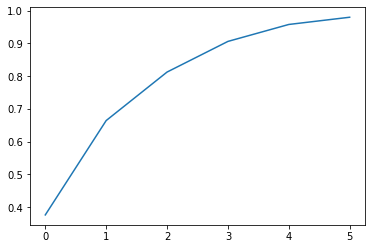

In [60]:
plt.plot(info[0,:])

In [49]:
info_fh = np.load("full_training_15.npy", allow_pickle=True)
info_fh.shape

(4, 15)

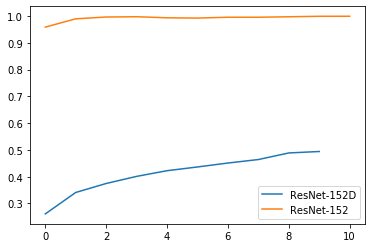

In [39]:
plt.plot(info_fh[0,:10])
plt.plot(info[0,:])
plt.legend(["ResNet-152D", 'ResNet-152'])

In [25]:
info[1,4]

tensor(0.6200, device='cuda:0', dtype=torch.float64)

In [32]:
# Epoch 0/9
# ----------
# train Loss: 2.5959 Acc: 0.4472
# val Loss: 1.6407 Acc: 0.5954

# Epoch 1/9
# ----------
# train Loss: 1.0887 Acc: 0.7272
# val Loss: 1.5100 Acc: 0.6238

# Epoch 2/9
# ----------
# train Loss: 0.4900 Acc: 0.8761
# val Loss: 1.5446 Acc: 0.6306

# Epoch 3/9
# ----------
# train Loss: 0.1971 Acc: 0.9539
# val Loss: 1.6339 Acc: 0.6307

# Epoch 4/9
# ----------
# train Loss: 0.0792 Acc: 0.9828
# val Loss: 1.7525 Acc: 0.6332

# Epoch 5/9
# ----------
# train Loss: 0.0339 Acc: 0.9938
# val Loss: 1.7763 Acc: 0.6320

# Epoch 6/9
# ----------
# train Loss: 0.0194 Acc: 0.9963
# val Loss: 1.8588 Acc: 0.6329

# Epoch 7/9
# ----------
# train Loss: 0.0226 Acc: 0.9952
# val Loss: 1.9862 Acc: 0.6181

# Epoch 8/9
# ----------
# train Loss: 0.0159 Acc: 0.9970
# val Loss: 1.8674 Acc: 0.6372

# Epoch 9/9
# ----------
# train Loss: 0.0046 Acc: 0.9997
# val Loss: 1.8635 Acc: 0.6400

train_data_kei = [0.4472, 0.7272, 0.8761, 0.9539, 0.9828, 0.9938, 0.9963, 0.9952, 0.9970, 0.9997]
val_data_kei = [0.5954, 0.6238, 0.6306, 0.6307, 0.6332, 0.6320, 0.6329, 0.6181, 0.6372, 0.64]
train_loss_kei = [2.5959, 1.0887, 0.4900, 0.1971, 0.0792, 0.0339, 0.0194, 0.0226, 0.0159, 0.0046]
val_loss_kei = [1.51, 1.5446, 1.6339, 1.7525, 1.7763, 1.8588, 1.9862, 1.8674, 1.8635]

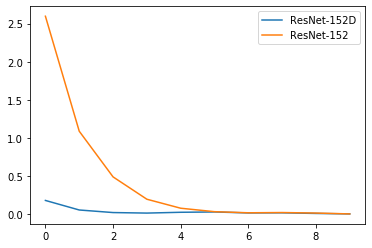

In [73]:
plt.plot(info_fh[2,:10])
plt.plot(train_loss_kei)
plt.legend(["ResNet-152D", 'ResNet-152'])

In [61]:
test_fhd = np.hstack([info[:,:3], info_fh])
test_fhd.shape

(4, 18)

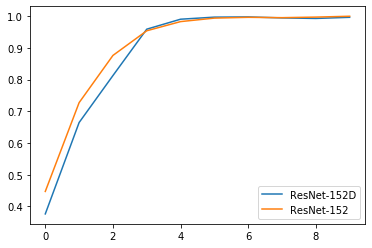

In [85]:


plt.plot(test_fhd[0,:10])
plt.plot(train_data_kei)
# plt.semilogy()
plt.legend(["ResNet-152D", 'ResNet-152'])